## Load data

In [67]:
from pyAudioAnalysis import audioBasicIO as aIO;
from pyAudioAnalysis import audioSegmentation as aS;
from pydub import AudioSegment;
from pydub.silence import split_on_silence;
import os;
import pandas as pd;
import numpy as np;
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Create new folders for the clips with removed silence
# Folders created within the Data folder

if not os.path.isdir('../Data/Train_no_silence'):
    os.mkdir('../Data/Train_no_silence')

if not os.path.isdir('../Data/Test_no_silence'):
    os.mkdir('../Data/Test_no_silence')

In [24]:
# Getting all the files from the training set
files_train = os.listdir('Train')
files_test = os.listdir('Test')

# sorting the files by name
files_train.sort()
files_test.sort()


# I'm using MacOS, and it by default has this .DS_store file, which I can't get rid of. 
# It's the first file in the folder.
# That's why I'm removing it. If you are using this code in your own PC, this might not apply to you.
# in that case, comment out the del function line.
# del files_train[0] 

In [25]:
# add path name to the file name
fnames_train = []
fnames_test  = []
for i in range(len(files_train)):
    fname = "Train/%s" % files_train[i]
    fnames_train.append(fname)
    
for i in range(len(files_test)):
    fname = "Test/%s" % files_test[i]
    fnames_test.append(fname)

# sort the list of file names with path     
fnames_train.sort()
fnames_test.sort()

In [49]:
# Load the categories dataframes
df_test = pd.read_csv('Categories_test.csv')
df_train = pd.read_csv('Categories_train.csv')

## Helper functions

In [27]:
#defining a function that turns the frame segment from seconds to miliseconds, because pydub operates on milisecs.
# It also depends on how many slices are returned. 
def turn_mSec(segments):
    for i in range(len(segments)):
        for j in range(len(segments[i])):
            segments[i][j] = 1000*segments[i][j]
    
    return segments

def turn_mSec_0(segments):
    if len(segments)==1:
        segments[0][0]=segments[0][0]*1000
        segments[0][1]=segments[0][1]*1000
    elif len(segments)==2:
        segments[0][0]=segments[0][0]*1000
        segments[0][1]=segments[0][1]*1000
        segments[1][0]=segments[1][0]*1000
        segments[1][1]=segments[1][1]*1000
    elif len(segments)==3:
        segments[0][0]=segments[0][0]*1000
        segments[0][1]=segments[0][1]*1000
        segments[1][0]=segments[1][0]*1000
        segments[1][1]=segments[1][1]*1000
        segments[2][0]=segments[2][0]*1000
        segments[2][1]=segments[2][1]*1000
    elif len(segments)==4:
        segments[0][0]=segments[0][0]*1000
        segments[0][1]=segments[0][1]*1000
        segments[1][0]=segments[1][0]*1000
        segments[1][1]=segments[1][1]*1000
        segments[2][0]=segments[2][0]*1000
        segments[2][1]=segments[2][1]*1000 
        segments[3][0]=segments[3][0]*1000
        segments[3][1]=segments[3][1]*1000    
    elif len(segments)==5:
        segments[0][0]=segments[0][0]*1000
        segments[0][1]=segments[0][1]*1000
        segments[1][0]=segments[1][0]*1000
        segments[1][1]=segments[1][1]*1000
        segments[2][0]=segments[2][0]*1000
        segments[2][1]=segments[2][1]*1000 
        segments[3][0]=segments[3][0]*1000
        segments[3][1]=segments[3][1]*1000
        segments[4][0]=segments[4][0]*1000
        segments[4][1]=segments[4][1]*1000
    
    return segments;


In [28]:
#defining a function to get the indicated segments, slice the sound, and then combine those slices.

def get_combine_slices(segments, sound):
    final_sound = sound[segments[0][0]:segments[0][1]]
    
    if len(segments)>1:
        for i in range(1,len(segments)):
            segment = segments[i]
            slice_i = sound[segment[0]:segment[1]]
            final_sound = final_sound+slice_i
    
    return final_sound

def get_combine_slices_0(segments, sound):
    if len(segments)==1:
        slice1 = sound[segments[0][0]:segments[0][1]]
        final_sound = slice1
    elif len(segments)==2:
        slice1 = sound[segments[0][0]:segments[0][1]]
        slice2 = sound[segments[1][0]:segments[1][1]]
        final_sound = slice1+slice2
    elif len(segments)==3:
        slice1 = sound[segments[0][0]:segments[0][1]]
        slice2 = sound[segments[1][0]:segments[1][1]]
        slice3 = sound[segments[2][0]:segments[2][1]]
        final_sound = slice1+slice2+slice3
    elif len(segments)==4:
        slice1 = sound[segments[0][0]:segments[0][1]]
        slice2 = sound[segments[1][0]:segments[1][1]]
        slice3 = sound[segments[2][0]:segments[2][1]]
        slice4 = sound[segments[3][0]:segments[3][1]]
        final_sound = slice1+slice2+slice3+slice4
    elif len(segments)==4:
        slice1 = sound[segments[0][0]:segments[0][1]]
        slice2 = sound[segments[1][0]:segments[1][1]]
        slice3 = sound[segments[2][0]:segments[2][1]]
        slice4 = sound[segments[3][0]:segments[3][1]]
        slice5 = sound[segments[4][0]:segments[4][1]]
        final_sound = slice1+slice2+slice3+slice4+slice5
    elif len(segments)==4:
        slice1 = sound[segments[0][0]:segments[0][1]]
        slice2 = sound[segments[1][0]:segments[1][1]]
        slice3 = sound[segments[2][0]:segments[2][1]]
        slice4 = sound[segments[3][0]:segments[3][1]]
        slice5 = sound[segments[4][0]:segments[4][1]]
        slice6 = sound[segments[4][0]:segments[4][1]]
        final_sound = slice1+slice2+slice3+slice4+slice5+slice6
        

    return final_sound


In [29]:
def display_time(seconds):
    if seconds <= 60:
        print('Duration: %f (s)' %seconds)
    elif 60 < seconds <= 3600:
        print('Duration: %f (min)' %(seconds/60))
    else:
        print('Duration: %f (h)' %(seconds/3600))

## Example

In [ ]:
##Try out
Fs, signal = aIO.read_audio_file(fnames_train[383]);
segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = False);
segments = turn_mSec(segments);  
sound = AudioSegment.from_file(fnames_train[i]);

print(segments)
print(sound)

## Train set
Remove silences from the _**train**_ set and save the clips to files

In [30]:
# Getting new short clips and saving them on file. This is for the train set. 
pathname = "Train_no_silence/";
oldDur = [];
newDur = [];

time_start = time.time()
for i in np.arange(0,len(fnames_train),1):    
    print(i)
    Fs, signal = aIO.read_audio_file(fnames_train[i]);
    segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = False);
    segments = turn_mSec(segments);
    
    sound = AudioSegment.from_file(fnames_train[i]);
    
    final_sound = get_combine_slices(segments, sound);
    
    new_fname_path = pathname + files_train[i].split('.')[0]
    output_file = "{}.wav".format(new_fname_path)
    print("Exporting file", output_file)
    final_sound.export(output_file, format="wav")
    
    old_dur = sound.duration_seconds
    new_dur = final_sound.duration_seconds
    
    oldDur.append((files_train[i], old_dur));
    newDur.append((files_train[i], new_dur));

time_end = time.time()
display_time(time_end-time_start)

0
Exporting file Train_no_silence/1001_DFA_ANG_XX.wav
1
Exporting file Train_no_silence/1001_DFA_DIS_XX.wav
2
Exporting file Train_no_silence/1001_DFA_FEA_XX.wav
3
Exporting file Train_no_silence/1001_DFA_HAP_XX.wav
4
Exporting file Train_no_silence/1001_DFA_NEU_XX.wav
5
Exporting file Train_no_silence/1001_DFA_SAD_XX.wav
6
Exporting file Train_no_silence/1001_IEO_NEU_XX.wav
7
Exporting file Train_no_silence/1001_IOM_ANG_XX.wav
8
Exporting file Train_no_silence/1001_IOM_DIS_XX.wav
9
Exporting file Train_no_silence/1001_IOM_FEA_XX.wav
10
Exporting file Train_no_silence/1001_IOM_HAP_XX.wav
11
Exporting file Train_no_silence/1001_IOM_NEU_XX.wav
12
Exporting file Train_no_silence/1001_IOM_SAD_XX.wav
13
Exporting file Train_no_silence/1001_ITH_ANG_XX.wav
14
Exporting file Train_no_silence/1001_ITH_DIS_XX.wav
15
Exporting file Train_no_silence/1001_ITH_FEA_XX.wav
16
Exporting file Train_no_silence/1001_ITH_HAP_XX.wav
17
Exporting file Train_no_silence/1001_ITH_NEU_XX.wav
18
Exporting file Tr

Exporting file Train_no_silence/1003_ITH_NEU_XX.wav
151
Exporting file Train_no_silence/1003_ITH_SAD_XX.wav
152
Exporting file Train_no_silence/1003_ITS_ANG_XX.wav
153
Exporting file Train_no_silence/1003_ITS_DIS_XX.wav
154
Exporting file Train_no_silence/1003_ITS_FEA_XX.wav
155
Exporting file Train_no_silence/1003_ITS_HAP_XX.wav
156
Exporting file Train_no_silence/1003_ITS_NEU_XX.wav
157
Exporting file Train_no_silence/1003_ITS_SAD_XX.wav
158
Exporting file Train_no_silence/1003_IWL_ANG_XX.wav
159
Exporting file Train_no_silence/1003_IWL_DIS_XX.wav
160
Exporting file Train_no_silence/1003_IWL_FEA_XX.wav
161
Exporting file Train_no_silence/1003_IWL_HAP_XX.wav
162
Exporting file Train_no_silence/1003_IWL_NEU_XX.wav
163
Exporting file Train_no_silence/1003_IWL_SAD_XX.wav
164
Exporting file Train_no_silence/1003_IWW_ANG_XX.wav
165
Exporting file Train_no_silence/1003_IWW_DIS_XX.wav
166
Exporting file Train_no_silence/1003_IWW_FEA_XX.wav
167
Exporting file Train_no_silence/1003_IWW_HAP_XX.

Exporting file Train_no_silence/1005_IWL_SAD_XX.wav
298
Exporting file Train_no_silence/1005_IWW_ANG_XX.wav
299
Exporting file Train_no_silence/1005_IWW_DIS_XX.wav
300
Exporting file Train_no_silence/1005_IWW_FEA_XX.wav
301
Exporting file Train_no_silence/1005_IWW_HAP_XX.wav
302
Exporting file Train_no_silence/1005_IWW_NEU_XX.wav
303
Exporting file Train_no_silence/1005_IWW_SAD_XX.wav
304
Exporting file Train_no_silence/1005_MTI_ANG_XX.wav
305
Exporting file Train_no_silence/1005_MTI_DIS_XX.wav
306
Exporting file Train_no_silence/1005_MTI_FEA_XX.wav
307
Exporting file Train_no_silence/1005_MTI_HAP_XX.wav
308
Exporting file Train_no_silence/1005_MTI_NEU_XX.wav
309
Exporting file Train_no_silence/1005_MTI_SAD_XX.wav
310
Exporting file Train_no_silence/1005_TAI_ANG_XX.wav
311
Exporting file Train_no_silence/1005_TAI_DIS_XX.wav
312
Exporting file Train_no_silence/1005_TAI_FEA_XX.wav
313
Exporting file Train_no_silence/1005_TAI_HAP_XX.wav
314
Exporting file Train_no_silence/1005_TAI_NEU_XX.

Exporting file Train_no_silence/1009_TIE_DIS_XX.wav
446
Exporting file Train_no_silence/1009_TIE_FEA_XX.wav
447
Exporting file Train_no_silence/1009_TIE_HAP_XX.wav
448
Exporting file Train_no_silence/1009_TIE_NEU_XX.wav
449
Exporting file Train_no_silence/1009_TIE_SAD_XX.wav
450
Exporting file Train_no_silence/1009_TSI_ANG_XX.wav
451
Exporting file Train_no_silence/1009_TSI_DIS_XX.wav
452
Exporting file Train_no_silence/1009_TSI_FEA_XX.wav
453
Exporting file Train_no_silence/1009_TSI_HAP_XX.wav
454
Exporting file Train_no_silence/1009_TSI_NEU_XX.wav
455
Exporting file Train_no_silence/1009_TSI_SAD_XX.wav
456
Exporting file Train_no_silence/1009_WSI_ANG_XX.wav
457
Exporting file Train_no_silence/1009_WSI_DIS_XX.wav
458
Exporting file Train_no_silence/1009_WSI_FEA_XX.wav
459
Exporting file Train_no_silence/1009_WSI_HAP_XX.wav
460
Exporting file Train_no_silence/1009_WSI_NEU_XX.wav
461
Exporting file Train_no_silence/1009_WSI_SAD_XX.wav
462
Exporting file Train_no_silence/1010_DFA_ANG_XX.

Exporting file Train_no_silence/1011_WSI_HAP_XX.wav
594
Exporting file Train_no_silence/1011_WSI_NEU_XX.wav
595
Exporting file Train_no_silence/1011_WSI_SAD_XX.wav
596
Exporting file Train_no_silence/1012_DFA_ANG_XX.wav
597
Exporting file Train_no_silence/1012_DFA_DIS_XX.wav
598
Exporting file Train_no_silence/1012_DFA_FEA_XX.wav
599
Exporting file Train_no_silence/1012_DFA_HAP_XX.wav
600
Exporting file Train_no_silence/1012_DFA_NEU_XX.wav
601
Exporting file Train_no_silence/1012_DFA_SAD_XX.wav
602
Exporting file Train_no_silence/1012_IEO_NEU_XX.wav
603
Exporting file Train_no_silence/1012_IOM_ANG_XX.wav
604
Exporting file Train_no_silence/1012_IOM_DIS_XX.wav
605
Exporting file Train_no_silence/1012_IOM_FEA_XX.wav
606
Exporting file Train_no_silence/1012_IOM_HAP_XX.wav
607
Exporting file Train_no_silence/1012_IOM_NEU_XX.wav
608
Exporting file Train_no_silence/1012_IOM_SAD_XX.wav
609
Exporting file Train_no_silence/1012_ITH_ANG_XX.wav
610
Exporting file Train_no_silence/1012_ITH_DIS_XX.

Exporting file Train_no_silence/1015_IOM_SAD_XX.wav
743
Exporting file Train_no_silence/1015_ITH_ANG_XX.wav
744
Exporting file Train_no_silence/1015_ITH_DIS_XX.wav
745
Exporting file Train_no_silence/1015_ITH_FEA_XX.wav
746
Exporting file Train_no_silence/1015_ITH_HAP_XX.wav
747
Exporting file Train_no_silence/1015_ITH_NEU_XX.wav
748
Exporting file Train_no_silence/1015_ITH_SAD_XX.wav
749
Exporting file Train_no_silence/1015_ITS_ANG_XX.wav
750
Exporting file Train_no_silence/1015_ITS_DIS_XX.wav
751
Exporting file Train_no_silence/1015_ITS_FEA_XX.wav
752
Exporting file Train_no_silence/1015_ITS_HAP_XX.wav
753
Exporting file Train_no_silence/1015_ITS_NEU_XX.wav
754
Exporting file Train_no_silence/1015_ITS_SAD_XX.wav
755
Exporting file Train_no_silence/1015_IWL_ANG_XX.wav
756
Exporting file Train_no_silence/1015_IWL_DIS_XX.wav
757
Exporting file Train_no_silence/1015_IWL_FEA_XX.wav
758
Exporting file Train_no_silence/1015_IWL_HAP_XX.wav
759
Exporting file Train_no_silence/1015_IWL_NEU_XX.

Exporting file Train_no_silence/1017_IWL_DIS_XX.wav
891
Exporting file Train_no_silence/1017_IWL_FEA_XX.wav
892
Exporting file Train_no_silence/1017_IWL_HAP_XX.wav
893
Exporting file Train_no_silence/1017_IWL_NEU_XX.wav
894
Exporting file Train_no_silence/1017_IWL_SAD_XX.wav
895
Exporting file Train_no_silence/1017_IWW_ANG_XX.wav
896
Exporting file Train_no_silence/1017_IWW_DIS_XX.wav
897
Exporting file Train_no_silence/1017_IWW_FEA_XX.wav
898
Exporting file Train_no_silence/1017_IWW_HAP_XX.wav
899
Exporting file Train_no_silence/1017_IWW_NEU_XX.wav
900
Exporting file Train_no_silence/1017_IWW_SAD_XX.wav
901
Exporting file Train_no_silence/1017_MTI_ANG_XX.wav
902
Exporting file Train_no_silence/1017_MTI_DIS_XX.wav
903
Exporting file Train_no_silence/1017_MTI_FEA_XX.wav
904
Exporting file Train_no_silence/1017_MTI_HAP_XX.wav
905
Exporting file Train_no_silence/1017_MTI_NEU_XX.wav
906
Exporting file Train_no_silence/1017_MTI_SAD_XX.wav
907
Exporting file Train_no_silence/1017_TAI_ANG_XX.

Exporting file Train_no_silence/1019_TAI_DIS_XX.wav
1037
Exporting file Train_no_silence/1019_TAI_FEA_XX.wav
1038
Exporting file Train_no_silence/1019_TAI_HAP_XX.wav
1039
Exporting file Train_no_silence/1019_TAI_NEU_XX.wav
1040
Exporting file Train_no_silence/1019_TAI_SAD_XX.wav
1041
Exporting file Train_no_silence/1019_TIE_ANG_XX.wav
1042
Exporting file Train_no_silence/1019_TIE_DIS_XX.wav
1043
Exporting file Train_no_silence/1019_TIE_FEA_XX.wav
1044
Exporting file Train_no_silence/1019_TIE_HAP_XX.wav
1045
Exporting file Train_no_silence/1019_TIE_NEU_XX.wav
1046
Exporting file Train_no_silence/1019_TIE_SAD_XX.wav
1047
Exporting file Train_no_silence/1019_TSI_ANG_XX.wav
1048
Exporting file Train_no_silence/1019_TSI_DIS_XX.wav
1049
Exporting file Train_no_silence/1019_TSI_FEA_XX.wav
1050
Exporting file Train_no_silence/1019_TSI_HAP_XX.wav
1051
Exporting file Train_no_silence/1019_TSI_NEU_XX.wav
1052
Exporting file Train_no_silence/1019_TSI_SAD_XX.wav
1053
Exporting file Train_no_silence

Exporting file Train_no_silence/1021_TSI_ANG_XX.wav
1182
Exporting file Train_no_silence/1021_TSI_DIS_XX.wav
1183
Exporting file Train_no_silence/1021_TSI_FEA_XX.wav
1184
Exporting file Train_no_silence/1021_TSI_HAP_XX.wav
1185
Exporting file Train_no_silence/1021_TSI_NEU_XX.wav
1186
Exporting file Train_no_silence/1021_TSI_SAD_XX.wav
1187
Exporting file Train_no_silence/1021_WSI_ANG_XX.wav
1188
Exporting file Train_no_silence/1021_WSI_DIS_XX.wav
1189
Exporting file Train_no_silence/1021_WSI_FEA_XX.wav
1190
Exporting file Train_no_silence/1021_WSI_HAP_XX.wav
1191
Exporting file Train_no_silence/1021_WSI_NEU_XX.wav
1192
Exporting file Train_no_silence/1021_WSI_SAD_XX.wav
1193
Exporting file Train_no_silence/1022_DFA_ANG_XX.wav
1194
Exporting file Train_no_silence/1022_DFA_DIS_XX.wav
1195
Exporting file Train_no_silence/1022_DFA_FEA_XX.wav
1196
Exporting file Train_no_silence/1022_DFA_HAP_XX.wav
1197
Exporting file Train_no_silence/1022_DFA_NEU_XX.wav
1198
Exporting file Train_no_silence

Exporting file Train_no_silence/1024_DFA_DIS_XX.wav
1329
Exporting file Train_no_silence/1024_DFA_FEA_XX.wav
1330
Exporting file Train_no_silence/1024_DFA_HAP_XX.wav
1331
Exporting file Train_no_silence/1024_DFA_NEU_XX.wav
1332
Exporting file Train_no_silence/1024_DFA_SAD_XX.wav
1333
Exporting file Train_no_silence/1024_IEO_NEU_XX.wav
1334
Exporting file Train_no_silence/1024_IOM_ANG_XX.wav
1335
Exporting file Train_no_silence/1024_IOM_DIS_XX.wav
1336
Exporting file Train_no_silence/1024_IOM_FEA_XX.wav
1337
Exporting file Train_no_silence/1024_IOM_HAP_XX.wav
1338
Exporting file Train_no_silence/1024_IOM_NEU_XX.wav
1339
Exporting file Train_no_silence/1024_IOM_SAD_XX.wav
1340
Exporting file Train_no_silence/1024_ITH_ANG_XX.wav
1341
Exporting file Train_no_silence/1024_ITH_DIS_XX.wav
1342
Exporting file Train_no_silence/1024_ITH_FEA_XX.wav
1343
Exporting file Train_no_silence/1024_ITH_HAP_XX.wav
1344
Exporting file Train_no_silence/1024_ITH_NEU_XX.wav
1345
Exporting file Train_no_silence

Exporting file Train_no_silence/1026_IOM_SAD_XX.wav
1474
Exporting file Train_no_silence/1026_ITH_ANG_XX.wav
1475
Exporting file Train_no_silence/1026_ITH_DIS_XX.wav
1476
Exporting file Train_no_silence/1026_ITH_FEA_XX.wav
1477
Exporting file Train_no_silence/1026_ITH_HAP_XX.wav
1478
Exporting file Train_no_silence/1026_ITH_NEU_XX.wav
1479
Exporting file Train_no_silence/1026_ITH_SAD_XX.wav
1480
Exporting file Train_no_silence/1026_ITS_ANG_XX.wav
1481
Exporting file Train_no_silence/1026_ITS_DIS_XX.wav
1482
Exporting file Train_no_silence/1026_ITS_FEA_XX.wav
1483
Exporting file Train_no_silence/1026_ITS_HAP_XX.wav
1484
Exporting file Train_no_silence/1026_ITS_NEU_XX.wav
1485
Exporting file Train_no_silence/1026_ITS_SAD_XX.wav
1486
Exporting file Train_no_silence/1026_IWL_ANG_XX.wav
1487
Exporting file Train_no_silence/1026_IWL_DIS_XX.wav
1488
Exporting file Train_no_silence/1026_IWL_FEA_XX.wav
1489
Exporting file Train_no_silence/1026_IWL_HAP_XX.wav
1490
Exporting file Train_no_silence

Exporting file Train_no_silence/1030_ITS_SAD_XX.wav
1620
Exporting file Train_no_silence/1030_IWL_ANG_XX.wav
1621
Exporting file Train_no_silence/1030_IWL_DIS_XX.wav
1622
Exporting file Train_no_silence/1030_IWL_FEA_XX.wav
1623
Exporting file Train_no_silence/1030_IWL_HAP_XX.wav
1624
Exporting file Train_no_silence/1030_IWL_NEU_XX.wav
1625
Exporting file Train_no_silence/1030_IWL_SAD_XX.wav
1626
Exporting file Train_no_silence/1030_IWW_ANG_XX.wav
1627
Exporting file Train_no_silence/1030_IWW_DIS_XX.wav
1628
Exporting file Train_no_silence/1030_IWW_FEA_XX.wav
1629
Exporting file Train_no_silence/1030_IWW_HAP_XX.wav
1630
Exporting file Train_no_silence/1030_IWW_NEU_XX.wav
1631
Exporting file Train_no_silence/1030_IWW_SAD_XX.wav
1632
Exporting file Train_no_silence/1030_MTI_ANG_XX.wav
1633
Exporting file Train_no_silence/1030_MTI_DIS_XX.wav
1634
Exporting file Train_no_silence/1030_MTI_FEA_XX.wav
1635
Exporting file Train_no_silence/1030_MTI_HAP_XX.wav
1636
Exporting file Train_no_silence

Exporting file Train_no_silence/1033_MTI_ANG_XX.wav
1767
Exporting file Train_no_silence/1033_MTI_DIS_XX.wav
1768
Exporting file Train_no_silence/1033_MTI_FEA_XX.wav
1769
Exporting file Train_no_silence/1033_MTI_HAP_XX.wav
1770
Exporting file Train_no_silence/1033_MTI_NEU_XX.wav
1771
Exporting file Train_no_silence/1033_MTI_SAD_XX.wav
1772
Exporting file Train_no_silence/1033_TAI_ANG_XX.wav
1773
Exporting file Train_no_silence/1033_TAI_DIS_XX.wav
1774
Exporting file Train_no_silence/1033_TAI_FEA_XX.wav
1775
Exporting file Train_no_silence/1033_TAI_HAP_XX.wav
1776
Exporting file Train_no_silence/1033_TAI_NEU_XX.wav
1777
Exporting file Train_no_silence/1033_TAI_SAD_XX.wav
1778
Exporting file Train_no_silence/1033_TIE_ANG_XX.wav
1779
Exporting file Train_no_silence/1033_TIE_DIS_XX.wav
1780
Exporting file Train_no_silence/1033_TIE_FEA_XX.wav
1781
Exporting file Train_no_silence/1033_TIE_HAP_XX.wav
1782
Exporting file Train_no_silence/1033_TIE_NEU_XX.wav
1783
Exporting file Train_no_silence

Exporting file Train_no_silence/1036_TAI_SAD_XX.wav
1912
Exporting file Train_no_silence/1036_TIE_ANG_XX.wav
1913
Exporting file Train_no_silence/1036_TIE_DIS_XX.wav
1914
Exporting file Train_no_silence/1036_TIE_FEA_XX.wav
1915
Exporting file Train_no_silence/1036_TIE_HAP_XX.wav
1916
Exporting file Train_no_silence/1036_TIE_NEU_XX.wav
1917
Exporting file Train_no_silence/1036_TIE_SAD_XX.wav
1918
Exporting file Train_no_silence/1036_TSI_ANG_XX.wav
1919
Exporting file Train_no_silence/1036_TSI_DIS_XX.wav
1920
Exporting file Train_no_silence/1036_TSI_FEA_XX.wav
1921
Exporting file Train_no_silence/1036_TSI_HAP_XX.wav
1922
Exporting file Train_no_silence/1036_TSI_NEU_XX.wav
1923
Exporting file Train_no_silence/1036_TSI_SAD_XX.wav
1924
Exporting file Train_no_silence/1036_WSI_ANG_XX.wav
1925
Exporting file Train_no_silence/1036_WSI_DIS_XX.wav
1926
Exporting file Train_no_silence/1036_WSI_FEA_XX.wav
1927
Exporting file Train_no_silence/1036_WSI_HAP_XX.wav
1928
Exporting file Train_no_silence

Exporting file Train_no_silence/1038_TSI_NEU_XX.wav
2057
Exporting file Train_no_silence/1038_TSI_SAD_XX.wav
2058
Exporting file Train_no_silence/1038_WSI_ANG_XX.wav
2059
Exporting file Train_no_silence/1038_WSI_DIS_XX.wav
2060
Exporting file Train_no_silence/1038_WSI_FEA_XX.wav
2061
Exporting file Train_no_silence/1038_WSI_HAP_XX.wav
2062
Exporting file Train_no_silence/1038_WSI_NEU_XX.wav
2063
Exporting file Train_no_silence/1038_WSI_SAD_XX.wav
2064
Exporting file Train_no_silence/1041_DFA_ANG_XX.wav
2065
Exporting file Train_no_silence/1041_DFA_DIS_XX.wav
2066
Exporting file Train_no_silence/1041_DFA_FEA_XX.wav
2067
Exporting file Train_no_silence/1041_DFA_HAP_XX.wav
2068
Exporting file Train_no_silence/1041_DFA_NEU_XX.wav
2069
Exporting file Train_no_silence/1041_DFA_SAD_XX.wav
2070
Exporting file Train_no_silence/1041_IEO_NEU_XX.wav
2071
Exporting file Train_no_silence/1041_IOM_ANG_XX.wav
2072
Exporting file Train_no_silence/1041_IOM_DIS_XX.wav
2073
Exporting file Train_no_silence

Exporting file Train_no_silence/1044_DFA_NEU_XX.wav
2203
Exporting file Train_no_silence/1044_DFA_SAD_XX.wav
2204
Exporting file Train_no_silence/1044_IEO_NEU_XX.wav
2205
Exporting file Train_no_silence/1044_IOM_ANG_XX.wav
2206
Exporting file Train_no_silence/1044_IOM_DIS_XX.wav
2207
Exporting file Train_no_silence/1044_IOM_FEA_XX.wav
2208
Exporting file Train_no_silence/1044_IOM_HAP_XX.wav
2209
Exporting file Train_no_silence/1044_IOM_NEU_XX.wav
2210
Exporting file Train_no_silence/1044_IOM_SAD_XX.wav
2211
Exporting file Train_no_silence/1044_ITH_ANG_XX.wav
2212
Exporting file Train_no_silence/1044_ITH_DIS_XX.wav
2213
Exporting file Train_no_silence/1044_ITH_FEA_XX.wav
2214
Exporting file Train_no_silence/1044_ITH_HAP_XX.wav
2215
Exporting file Train_no_silence/1044_ITH_NEU_XX.wav
2216
Exporting file Train_no_silence/1044_ITH_SAD_XX.wav
2217
Exporting file Train_no_silence/1044_ITS_ANG_XX.wav
2218
Exporting file Train_no_silence/1044_ITS_DIS_XX.wav
2219
Exporting file Train_no_silence

Exporting file Train_no_silence/1046_ITH_NEU_XX.wav
2350
Exporting file Train_no_silence/1046_ITH_SAD_XX.wav
2351
Exporting file Train_no_silence/1046_ITS_ANG_XX.wav
2352
Exporting file Train_no_silence/1046_ITS_DIS_XX.wav
2353
Exporting file Train_no_silence/1046_ITS_FEA_XX.wav
2354
Exporting file Train_no_silence/1046_ITS_HAP_XX.wav
2355
Exporting file Train_no_silence/1046_ITS_NEU_XX.wav
2356
Exporting file Train_no_silence/1046_ITS_SAD_XX.wav
2357
Exporting file Train_no_silence/1046_IWL_ANG_XX.wav
2358
Exporting file Train_no_silence/1046_IWL_DIS_XX.wav
2359
Exporting file Train_no_silence/1046_IWL_FEA_XX.wav
2360
Exporting file Train_no_silence/1046_IWL_HAP_XX.wav
2361
Exporting file Train_no_silence/1046_IWL_NEU_XX.wav
2362
Exporting file Train_no_silence/1046_IWL_SAD_XX.wav
2363
Exporting file Train_no_silence/1046_IWW_ANG_XX.wav
2364
Exporting file Train_no_silence/1046_IWW_DIS_XX.wav
2365
Exporting file Train_no_silence/1046_IWW_FEA_XX.wav
2366
Exporting file Train_no_silence

Exporting file Train_no_silence/1048_IWL_HAP_XX.wav
2495
Exporting file Train_no_silence/1048_IWL_NEU_XX.wav
2496
Exporting file Train_no_silence/1048_IWL_SAD_XX.wav
2497
Exporting file Train_no_silence/1048_IWW_ANG_XX.wav
2498
Exporting file Train_no_silence/1048_IWW_DIS_XX.wav
2499
Exporting file Train_no_silence/1048_IWW_FEA_XX.wav
2500
Exporting file Train_no_silence/1048_IWW_HAP_XX.wav
2501
Exporting file Train_no_silence/1048_IWW_NEU_XX.wav
2502
Exporting file Train_no_silence/1048_IWW_SAD_XX.wav
2503
Exporting file Train_no_silence/1048_MTI_ANG_XX.wav
2504
Exporting file Train_no_silence/1048_MTI_DIS_XX.wav
2505
Exporting file Train_no_silence/1048_MTI_FEA_XX.wav
2506
Exporting file Train_no_silence/1048_MTI_HAP_XX.wav
2507
Exporting file Train_no_silence/1048_MTI_NEU_XX.wav
2508
Exporting file Train_no_silence/1048_MTI_SAD_XX.wav
2509
Exporting file Train_no_silence/1048_TAI_ANG_XX.wav
2510
Exporting file Train_no_silence/1048_TAI_DIS_XX.wav
2511
Exporting file Train_no_silence

Exporting file Train_no_silence/1052_MTI_HAP_XX.wav
2641
Exporting file Train_no_silence/1052_MTI_NEU_XX.wav
2642
Exporting file Train_no_silence/1052_MTI_SAD_XX.wav
2643
Exporting file Train_no_silence/1052_TAI_ANG_XX.wav
2644
Exporting file Train_no_silence/1052_TAI_DIS_XX.wav
2645
Exporting file Train_no_silence/1052_TAI_FEA_XX.wav
2646
Exporting file Train_no_silence/1052_TAI_HAP_XX.wav
2647
Exporting file Train_no_silence/1052_TAI_NEU_XX.wav
2648
Exporting file Train_no_silence/1052_TAI_SAD_XX.wav
2649
Exporting file Train_no_silence/1052_TIE_ANG_XX.wav
2650
Exporting file Train_no_silence/1052_TIE_DIS_XX.wav
2651
Exporting file Train_no_silence/1052_TIE_FEA_XX.wav
2652
Exporting file Train_no_silence/1052_TIE_HAP_XX.wav
2653
Exporting file Train_no_silence/1052_TIE_NEU_XX.wav
2654
Exporting file Train_no_silence/1052_TIE_SAD_XX.wav
2655
Exporting file Train_no_silence/1052_TSI_ANG_XX.wav
2656
Exporting file Train_no_silence/1052_TSI_DIS_XX.wav
2657
Exporting file Train_no_silence

Exporting file Train_no_silence/1054_TIE_DIS_XX.wav
2785
Exporting file Train_no_silence/1054_TIE_FEA_XX.wav
2786
Exporting file Train_no_silence/1054_TIE_HAP_XX.wav
2787
Exporting file Train_no_silence/1054_TIE_NEU_XX.wav
2788
Exporting file Train_no_silence/1054_TIE_SAD_XX.wav
2789
Exporting file Train_no_silence/1054_TSI_ANG_XX.wav
2790
Exporting file Train_no_silence/1054_TSI_DIS_XX.wav
2791
Exporting file Train_no_silence/1054_TSI_FEA_XX.wav
2792
Exporting file Train_no_silence/1054_TSI_HAP_XX.wav
2793
Exporting file Train_no_silence/1054_TSI_NEU_XX.wav
2794
Exporting file Train_no_silence/1054_TSI_SAD_XX.wav
2795
Exporting file Train_no_silence/1054_WSI_ANG_XX.wav
2796
Exporting file Train_no_silence/1054_WSI_DIS_XX.wav
2797
Exporting file Train_no_silence/1054_WSI_FEA_XX.wav
2798
Exporting file Train_no_silence/1054_WSI_HAP_XX.wav
2799
Exporting file Train_no_silence/1054_WSI_NEU_XX.wav
2800
Exporting file Train_no_silence/1054_WSI_SAD_XX.wav
2801
Exporting file Train_no_silence

Exporting file Train_no_silence/1056_WSI_ANG_XX.wav
2930
Exporting file Train_no_silence/1056_WSI_DIS_XX.wav
2931
Exporting file Train_no_silence/1056_WSI_FEA_XX.wav
2932
Exporting file Train_no_silence/1056_WSI_HAP_XX.wav
2933
Exporting file Train_no_silence/1056_WSI_NEU_XX.wav
2934
Exporting file Train_no_silence/1056_WSI_SAD_XX.wav
2935
Exporting file Train_no_silence/1057_DFA_ANG_XX.wav
2936
Exporting file Train_no_silence/1057_DFA_DIS_XX.wav
2937
Exporting file Train_no_silence/1057_DFA_FEA_XX.wav
2938
Exporting file Train_no_silence/1057_DFA_HAP_XX.wav
2939
Exporting file Train_no_silence/1057_DFA_NEU_XX.wav
2940
Exporting file Train_no_silence/1057_DFA_SAD_XX.wav
2941
Exporting file Train_no_silence/1057_IEO_NEU_XX.wav
2942
Exporting file Train_no_silence/1057_IOM_ANG_XX.wav
2943
Exporting file Train_no_silence/1057_IOM_DIS_XX.wav
2944
Exporting file Train_no_silence/1057_IOM_FEA_XX.wav
2945
Exporting file Train_no_silence/1057_IOM_HAP_XX.wav
2946
Exporting file Train_no_silence

Exporting file Train_no_silence/1059_IEO_NEU_XX.wav
3076
Exporting file Train_no_silence/1059_IOM_ANG_XX.wav
3077
Exporting file Train_no_silence/1059_IOM_DIS_XX.wav
3078
Exporting file Train_no_silence/1059_IOM_FEA_XX.wav
3079
Exporting file Train_no_silence/1059_IOM_HAP_XX.wav
3080
Exporting file Train_no_silence/1059_IOM_NEU_XX.wav
3081
Exporting file Train_no_silence/1059_IOM_SAD_XX.wav
3082
Exporting file Train_no_silence/1059_ITH_ANG_XX.wav
3083
Exporting file Train_no_silence/1059_ITH_DIS_XX.wav
3084
Exporting file Train_no_silence/1059_ITH_FEA_XX.wav
3085
Exporting file Train_no_silence/1059_ITH_HAP_XX.wav
3086
Exporting file Train_no_silence/1059_ITH_NEU_XX.wav
3087
Exporting file Train_no_silence/1059_ITH_SAD_XX.wav
3088
Exporting file Train_no_silence/1059_ITS_ANG_XX.wav
3089
Exporting file Train_no_silence/1059_ITS_DIS_XX.wav
3090
Exporting file Train_no_silence/1059_ITS_FEA_XX.wav
3091
Exporting file Train_no_silence/1059_ITS_HAP_XX.wav
3092
Exporting file Train_no_silence

Exporting file Train_no_silence/1062_ITH_HAP_XX.wav
3220
Exporting file Train_no_silence/1062_ITH_NEU_XX.wav
3221
Exporting file Train_no_silence/1062_ITH_SAD_XX.wav
3222
Exporting file Train_no_silence/1062_ITS_ANG_XX.wav
3223
Exporting file Train_no_silence/1062_ITS_DIS_XX.wav
3224
Exporting file Train_no_silence/1062_ITS_FEA_XX.wav
3225
Exporting file Train_no_silence/1062_ITS_HAP_XX.wav
3226
Exporting file Train_no_silence/1062_ITS_NEU_XX.wav
3227
Exporting file Train_no_silence/1062_ITS_SAD_XX.wav
3228
Exporting file Train_no_silence/1062_IWL_ANG_XX.wav
3229
Exporting file Train_no_silence/1062_IWL_DIS_XX.wav
3230
Exporting file Train_no_silence/1062_IWL_FEA_XX.wav
3231
Exporting file Train_no_silence/1062_IWL_HAP_XX.wav
3232
Exporting file Train_no_silence/1062_IWL_NEU_XX.wav
3233
Exporting file Train_no_silence/1062_IWL_SAD_XX.wav
3234
Exporting file Train_no_silence/1062_IWW_ANG_XX.wav
3235
Exporting file Train_no_silence/1062_IWW_DIS_XX.wav
3236
Exporting file Train_no_silence

Exporting file Train_no_silence/1064_IWL_DIS_XX.wav
3364
Exporting file Train_no_silence/1064_IWL_FEA_XX.wav
3365
Exporting file Train_no_silence/1064_IWL_HAP_XX.wav
3366
Exporting file Train_no_silence/1064_IWL_NEU_XX.wav
3367
Exporting file Train_no_silence/1064_IWL_SAD_XX.wav
3368
Exporting file Train_no_silence/1064_IWW_ANG_XX.wav
3369
Exporting file Train_no_silence/1064_IWW_DIS_XX.wav
3370
Exporting file Train_no_silence/1064_IWW_FEA_XX.wav
3371
Exporting file Train_no_silence/1064_IWW_HAP_XX.wav
3372
Exporting file Train_no_silence/1064_IWW_NEU_XX.wav
3373
Exporting file Train_no_silence/1064_IWW_SAD_XX.wav
3374
Exporting file Train_no_silence/1064_MTI_ANG_XX.wav
3375
Exporting file Train_no_silence/1064_MTI_DIS_XX.wav
3376
Exporting file Train_no_silence/1064_MTI_FEA_XX.wav
3377
Exporting file Train_no_silence/1064_MTI_HAP_XX.wav
3378
Exporting file Train_no_silence/1064_MTI_NEU_XX.wav
3379
Exporting file Train_no_silence/1064_MTI_SAD_XX.wav
3380
Exporting file Train_no_silence

Exporting file Train_no_silence/1067_MTI_DIS_XX.wav
3510
Exporting file Train_no_silence/1067_MTI_FEA_XX.wav
3511
Exporting file Train_no_silence/1067_MTI_HAP_XX.wav
3512
Exporting file Train_no_silence/1067_MTI_NEU_XX.wav
3513
Exporting file Train_no_silence/1067_MTI_SAD_XX.wav
3514
Exporting file Train_no_silence/1067_TAI_ANG_XX.wav
3515
Exporting file Train_no_silence/1067_TAI_DIS_XX.wav
3516
Exporting file Train_no_silence/1067_TAI_FEA_XX.wav
3517
Exporting file Train_no_silence/1067_TAI_HAP_XX.wav
3518
Exporting file Train_no_silence/1067_TAI_NEU_XX.wav
3519
Exporting file Train_no_silence/1067_TAI_SAD_XX.wav
3520
Exporting file Train_no_silence/1067_TIE_ANG_XX.wav
3521
Exporting file Train_no_silence/1067_TIE_DIS_XX.wav
3522
Exporting file Train_no_silence/1067_TIE_FEA_XX.wav
3523
Exporting file Train_no_silence/1067_TIE_HAP_XX.wav
3524
Exporting file Train_no_silence/1067_TIE_NEU_XX.wav
3525
Exporting file Train_no_silence/1067_TIE_SAD_XX.wav
3526
Exporting file Train_no_silence

Exporting file Train_no_silence/1071_TIE_DIS_XX.wav
3656
Exporting file Train_no_silence/1071_TIE_FEA_XX.wav
3657
Exporting file Train_no_silence/1071_TIE_HAP_XX.wav
3658
Exporting file Train_no_silence/1071_TIE_NEU_XX.wav
3659
Exporting file Train_no_silence/1071_TIE_SAD_XX.wav
3660
Exporting file Train_no_silence/1071_TSI_ANG_XX.wav
3661
Exporting file Train_no_silence/1071_TSI_DIS_XX.wav
3662
Exporting file Train_no_silence/1071_TSI_FEA_XX.wav
3663
Exporting file Train_no_silence/1071_TSI_HAP_XX.wav
3664
Exporting file Train_no_silence/1071_TSI_NEU_XX.wav
3665
Exporting file Train_no_silence/1071_TSI_SAD_XX.wav
3666
Exporting file Train_no_silence/1071_WSI_ANG_XX.wav
3667
Exporting file Train_no_silence/1071_WSI_DIS_XX.wav
3668
Exporting file Train_no_silence/1071_WSI_FEA_XX.wav
3669
Exporting file Train_no_silence/1071_WSI_HAP_XX.wav
3670
Exporting file Train_no_silence/1071_WSI_NEU_XX.wav
3671
Exporting file Train_no_silence/1071_WSI_SAD_XX.wav
3672
Exporting file Train_no_silence

Exporting file Train_no_silence/1073_WSI_DIS_XX.wav
3802
Exporting file Train_no_silence/1073_WSI_FEA_XX.wav
3803
Exporting file Train_no_silence/1073_WSI_HAP_XX.wav
3804
Exporting file Train_no_silence/1073_WSI_NEU_XX.wav
3805
Exporting file Train_no_silence/1073_WSI_SAD_XX.wav
3806
Exporting file Train_no_silence/1074_DFA_ANG_XX.wav
3807
Exporting file Train_no_silence/1074_DFA_DIS_XX.wav
3808
Exporting file Train_no_silence/1074_DFA_FEA_XX.wav
3809
Exporting file Train_no_silence/1074_DFA_HAP_XX.wav
3810
Exporting file Train_no_silence/1074_DFA_NEU_XX.wav
3811
Exporting file Train_no_silence/1074_DFA_SAD_XX.wav
3812
Exporting file Train_no_silence/1074_IEO_NEU_XX.wav
3813
Exporting file Train_no_silence/1074_IOM_ANG_XX.wav
3814
Exporting file Train_no_silence/1074_IOM_DIS_XX.wav
3815
Exporting file Train_no_silence/1074_IOM_FEA_XX.wav
3816
Exporting file Train_no_silence/1074_IOM_HAP_XX.wav
3817
Exporting file Train_no_silence/1074_IOM_NEU_XX.wav
3818
Exporting file Train_no_silence

Exporting file Train_no_silence/1076_IOM_ANG_XX.wav
3948
Exporting file Train_no_silence/1076_IOM_DIS_XX.wav
3949
Exporting file Train_no_silence/1076_IOM_FEA_XX.wav
3950
Exporting file Train_no_silence/1076_IOM_HAP_XX.wav
3951
Exporting file Train_no_silence/1076_IOM_NEU_XX.wav
3952
Exporting file Train_no_silence/1076_IOM_SAD_XX.wav
3953
Exporting file Train_no_silence/1076_ITH_ANG_XX.wav
3954
Exporting file Train_no_silence/1076_ITH_DIS_XX.wav
3955
Exporting file Train_no_silence/1076_ITH_FEA_XX.wav
3956
Exporting file Train_no_silence/1076_ITH_HAP_XX.wav
3957
Exporting file Train_no_silence/1076_ITH_NEU_XX.wav
3958
Exporting file Train_no_silence/1076_ITH_SAD_XX.wav
3959
Exporting file Train_no_silence/1076_ITS_ANG_XX.wav
3960
Exporting file Train_no_silence/1076_ITS_DIS_XX.wav
3961
Exporting file Train_no_silence/1076_ITS_FEA_XX.wav
3962
Exporting file Train_no_silence/1076_ITS_HAP_XX.wav
3963
Exporting file Train_no_silence/1076_ITS_SAD_XX.wav
3964
Exporting file Train_no_silence

Exporting file Train_no_silence/1078_ITS_DIS_XX.wav
4093
Exporting file Train_no_silence/1078_ITS_FEA_XX.wav
4094
Exporting file Train_no_silence/1078_ITS_HAP_XX.wav
4095
Exporting file Train_no_silence/1078_ITS_NEU_XX.wav
4096
Exporting file Train_no_silence/1078_ITS_SAD_XX.wav
4097
Exporting file Train_no_silence/1078_IWL_ANG_XX.wav
4098
Exporting file Train_no_silence/1078_IWL_DIS_XX.wav
4099
Exporting file Train_no_silence/1078_IWL_FEA_XX.wav
4100
Exporting file Train_no_silence/1078_IWL_HAP_XX.wav
4101
Exporting file Train_no_silence/1078_IWL_NEU_XX.wav
4102
Exporting file Train_no_silence/1078_IWL_SAD_XX.wav
4103
Exporting file Train_no_silence/1078_IWW_ANG_XX.wav
4104
Exporting file Train_no_silence/1078_IWW_DIS_XX.wav
4105
Exporting file Train_no_silence/1078_IWW_FEA_XX.wav
4106
Exporting file Train_no_silence/1078_IWW_HAP_XX.wav
4107
Exporting file Train_no_silence/1078_IWW_NEU_XX.wav
4108
Exporting file Train_no_silence/1078_IWW_SAD_XX.wav
4109
Exporting file Train_no_silence

Exporting file Train_no_silence/1081_IWW_ANG_XX.wav
4238
Exporting file Train_no_silence/1081_IWW_DIS_XX.wav
4239
Exporting file Train_no_silence/1081_IWW_FEA_XX.wav
4240
Exporting file Train_no_silence/1081_IWW_HAP_XX.wav
4241
Exporting file Train_no_silence/1081_IWW_NEU_XX.wav
4242
Exporting file Train_no_silence/1081_IWW_SAD_XX.wav
4243
Exporting file Train_no_silence/1081_MTI_ANG_XX.wav
4244
Exporting file Train_no_silence/1081_MTI_DIS_XX.wav
4245
Exporting file Train_no_silence/1081_MTI_FEA_XX.wav
4246
Exporting file Train_no_silence/1081_MTI_HAP_XX.wav
4247
Exporting file Train_no_silence/1081_MTI_NEU_XX.wav
4248
Exporting file Train_no_silence/1081_MTI_SAD_XX.wav
4249
Exporting file Train_no_silence/1081_TAI_ANG_XX.wav
4250
Exporting file Train_no_silence/1081_TAI_DIS_XX.wav
4251
Exporting file Train_no_silence/1081_TAI_FEA_XX.wav
4252
Exporting file Train_no_silence/1081_TAI_HAP_XX.wav
4253
Exporting file Train_no_silence/1081_TAI_NEU_XX.wav
4254
Exporting file Train_no_silence

Exporting file Train_no_silence/1083_MTI_SAD_XX.wav
4383
Exporting file Train_no_silence/1083_TAI_ANG_XX.wav
4384
Exporting file Train_no_silence/1083_TAI_DIS_XX.wav
4385
Exporting file Train_no_silence/1083_TAI_FEA_XX.wav
4386
Exporting file Train_no_silence/1083_TAI_HAP_XX.wav
4387
Exporting file Train_no_silence/1083_TAI_NEU_XX.wav
4388
Exporting file Train_no_silence/1083_TAI_SAD_XX.wav
4389
Exporting file Train_no_silence/1083_TIE_ANG_XX.wav
4390
Exporting file Train_no_silence/1083_TIE_DIS_XX.wav
4391
Exporting file Train_no_silence/1083_TIE_FEA_XX.wav
4392
Exporting file Train_no_silence/1083_TIE_HAP_XX.wav
4393
Exporting file Train_no_silence/1083_TIE_NEU_XX.wav
4394
Exporting file Train_no_silence/1083_TIE_SAD_XX.wav
4395
Exporting file Train_no_silence/1083_TSI_ANG_XX.wav
4396
Exporting file Train_no_silence/1083_TSI_DIS_XX.wav
4397
Exporting file Train_no_silence/1083_TSI_FEA_XX.wav
4398
Exporting file Train_no_silence/1083_TSI_HAP_XX.wav
4399
Exporting file Train_no_silence

Exporting file Train_no_silence/1085_TIE_SAD_XX.wav
4529
Exporting file Train_no_silence/1085_TSI_ANG_XX.wav
4530
Exporting file Train_no_silence/1085_TSI_DIS_XX.wav
4531
Exporting file Train_no_silence/1085_TSI_FEA_XX.wav
4532
Exporting file Train_no_silence/1085_TSI_HAP_XX.wav
4533
Exporting file Train_no_silence/1085_TSI_NEU_XX.wav
4534
Exporting file Train_no_silence/1085_TSI_SAD_XX.wav
4535
Exporting file Train_no_silence/1085_WSI_ANG_XX.wav
4536
Exporting file Train_no_silence/1085_WSI_DIS_XX.wav
4537
Exporting file Train_no_silence/1085_WSI_FEA_XX.wav
4538
Exporting file Train_no_silence/1085_WSI_HAP_XX.wav
4539
Exporting file Train_no_silence/1085_WSI_NEU_XX.wav
4540
Exporting file Train_no_silence/1085_WSI_SAD_XX.wav
4541
Exporting file Train_no_silence/1086_DFA_ANG_XX.wav
4542
Exporting file Train_no_silence/1086_DFA_DIS_XX.wav
4543
Exporting file Train_no_silence/1086_DFA_FEA_XX.wav
4544
Exporting file Train_no_silence/1086_DFA_HAP_XX.wav
4545
Exporting file Train_no_silence

Exporting file Train_no_silence/1087_WSI_HAP_XX.wav
4673
Exporting file Train_no_silence/1087_WSI_NEU_XX.wav
4674
Exporting file Train_no_silence/1087_WSI_SAD_XX.wav
4675
Exporting file Train_no_silence/1088_DFA_ANG_XX.wav
4676
Exporting file Train_no_silence/1088_DFA_DIS_XX.wav
4677
Exporting file Train_no_silence/1088_DFA_FEA_XX.wav
4678
Exporting file Train_no_silence/1088_DFA_HAP_XX.wav
4679
Exporting file Train_no_silence/1088_DFA_NEU_XX.wav
4680
Exporting file Train_no_silence/1088_DFA_SAD_XX.wav
4681
Exporting file Train_no_silence/1088_IEO_NEU_XX.wav
4682
Exporting file Train_no_silence/1088_IOM_ANG_XX.wav
4683
Exporting file Train_no_silence/1088_IOM_DIS_XX.wav
4684
Exporting file Train_no_silence/1088_IOM_FEA_XX.wav
4685
Exporting file Train_no_silence/1088_IOM_HAP_XX.wav
4686
Exporting file Train_no_silence/1088_IOM_NEU_XX.wav
4687
Exporting file Train_no_silence/1088_IOM_SAD_XX.wav
4688
Exporting file Train_no_silence/1088_ITH_ANG_XX.wav
4689
Exporting file Train_no_silence

Exporting file Train_no_silence/1091_IOM_ANG_XX.wav
4817
Exporting file Train_no_silence/1091_IOM_DIS_XX.wav
4818
Exporting file Train_no_silence/1091_IOM_FEA_XX.wav
4819
Exporting file Train_no_silence/1091_IOM_HAP_XX.wav
4820
Exporting file Train_no_silence/1091_IOM_NEU_XX.wav
4821
Exporting file Train_no_silence/1091_IOM_SAD_XX.wav
4822
Exporting file Train_no_silence/1091_ITH_ANG_XX.wav
4823
Exporting file Train_no_silence/1091_ITH_DIS_XX.wav
4824
Exporting file Train_no_silence/1091_ITH_FEA_XX.wav
4825
Exporting file Train_no_silence/1091_ITH_HAP_XX.wav
4826
Exporting file Train_no_silence/1091_ITH_NEU_XX.wav
4827
Exporting file Train_no_silence/1091_ITH_SAD_XX.wav
4828
Exporting file Train_no_silence/1091_ITS_ANG_XX.wav
4829
Exporting file Train_no_silence/1091_ITS_DIS_XX.wav
4830
Exporting file Train_no_silence/1091_ITS_FEA_XX.wav
4831
Exporting file Train_no_silence/1091_ITS_HAP_XX.wav
4832
Exporting file Train_no_silence/1091_ITS_NEU_XX.wav
4833
Exporting file Train_no_silence

Update the categories dataframe with the new duration

In [50]:
df_train['Old_Dur'] = 0
for i in range(len(oldDur)):
    file = oldDur[i][0].split('.')[0]
    dur  = oldDur[i][1]
    df_train.loc[df_train.FileID==file, 'Old_Dur'] = dur

df_train['New_Dur'] = 0
for i in range(len(newDur)):
    file = newDur[i][0].split('.')[0]
    dur  = newDur[i][1]
    df_train.loc[df_train.FileID==file, 'New_Dur'] = dur

In [51]:
df_train

,FileID,ActorID,SentenceID,Emotion,Intensity,Old_Dur,New_Dur
0,1001_DFA_ANG_XX,1001,DFA,ANG,XX,2.275562,1.40
1,1001_DFA_DIS_XX,1001,DFA,DIS,XX,2.335688,1.20
2,1001_DFA_FEA_XX,1001,DFA,FEA,XX,2.168813,0.92
3,1001_DFA_HAP_XX,1001,DFA,HAP,XX,1.868500,1.00
4,1001_DFA_NEU_XX,1001,DFA,NEU,XX,2.035375,0.90
...,...,...,...,...,...,...,...
4871,1091_WSI_DIS_XX,1091,WSI,DIS,XX,2.502500,0.96
4872,1091_WSI_FEA_XX,1091,WSI,FEA,XX,2.502500,1.14
4873,1091_WSI_HAP_XX,1091,WSI,HAP,XX,2.168813,1.32
4874,1091_WSI_NEU_XX,1091,WSI,NEU,XX,2.335688,0.60


In [60]:
# Save the dataframe back to disk
df_train.to_csv('Categories_train.csv', index=False)

## Test set
Remove silences from the _**test**_ set and save the clips to files

In [ ]:
# # Removing silence for Test data
# pathname_t = "Test_NoSilence/";
# oldDur_Test = [];
# newDur_Test = [];

# # Note the index starts from 0 in this loop, because there's no .DS_store file in this folder.
# for i in np.arange(0,len(fnames_test),1):
#     print(i)
#     t1, t2 = remove_silence(fnames_test[i], files_test[i], pathname_t);
#     oldDur_Test.append(t1);
#     newDur_Test.append(t2);    

In [78]:
# Getting new short clips and saving them on file. This is for the test set.  
pathname_t = "Test_no_silence/";
oldDur_Test = [];
newDur_Test = [];

time_start = time.time()
for i in np.arange(0,len(fnames_test),1):
    print(i)
    Fs, signal = aIO.read_audio_file(fnames_test[i]);
    segments = aS.silence_removal(signal, Fs, 0.020, 0.020, smooth_window = 0.4, weight = 0.4, plot = False);
    
    segments = turn_mSec(segments);
    sound = AudioSegment.from_file(fnames_test[i]);
    final_sound = get_combine_slices(segments, sound);
    
    new_fname_path = pathname_t + files_test[i].split('.')[0]
    output_file = "{}.wav".format(new_fname_path)
    print("Exporting file", output_file)
    final_sound.export(output_file, format="wav")
    
    old_dur = sound.duration_seconds
    new_dur = final_sound.duration_seconds
    
    oldDur_Test.append((files_test[i], old_dur));
    newDur_Test.append((files_test[i], new_dur));

time_end = time.time()
display_time(time_end-time_start)

0
Exporting file Test_no_silence/1006_DFA_ANG_XX.wav
1
Exporting file Test_no_silence/1006_DFA_DIS_XX.wav
2
Exporting file Test_no_silence/1006_DFA_FEA_XX.wav
3
Exporting file Test_no_silence/1006_DFA_HAP_XX.wav
4
Exporting file Test_no_silence/1006_DFA_NEU_XX.wav
5
Exporting file Test_no_silence/1006_DFA_SAD_XX.wav
6
Exporting file Test_no_silence/1006_IEO_NEU_XX.wav
7
Exporting file Test_no_silence/1006_IOM_ANG_XX.wav
8
Exporting file Test_no_silence/1006_IOM_DIS_XX.wav
9
Exporting file Test_no_silence/1006_IOM_FEA_XX.wav
10
Exporting file Test_no_silence/1006_IOM_HAP_XX.wav
11
Exporting file Test_no_silence/1006_IOM_NEU_XX.wav
12
Exporting file Test_no_silence/1006_IOM_SAD_XX.wav
13
Exporting file Test_no_silence/1006_ITH_ANG_XX.wav
14
Exporting file Test_no_silence/1006_ITH_DIS_XX.wav
15
Exporting file Test_no_silence/1006_ITH_FEA_XX.wav
16
Exporting file Test_no_silence/1006_ITH_HAP_XX.wav
17
Exporting file Test_no_silence/1006_ITH_NEU_XX.wav
18
Exporting file Test_no_silence/1006

Exporting file Test_no_silence/1013_ITS_NEU_XX.wav
152
Exporting file Test_no_silence/1013_ITS_SAD_XX.wav
153
Exporting file Test_no_silence/1013_IWL_ANG_XX.wav
154
Exporting file Test_no_silence/1013_IWL_DIS_XX.wav
155
Exporting file Test_no_silence/1013_IWL_FEA_XX.wav
156
Exporting file Test_no_silence/1013_IWL_HAP_XX.wav
157
Exporting file Test_no_silence/1013_IWL_NEU_XX.wav
158
Exporting file Test_no_silence/1013_IWL_SAD_XX.wav
159
Exporting file Test_no_silence/1013_IWW_ANG_XX.wav
160
Exporting file Test_no_silence/1013_IWW_DIS_XX.wav
161
Exporting file Test_no_silence/1013_IWW_FEA_XX.wav
162
Exporting file Test_no_silence/1013_IWW_HAP_XX.wav
163
Exporting file Test_no_silence/1013_IWW_NEU_XX.wav
164
Exporting file Test_no_silence/1013_IWW_SAD_XX.wav
165
Exporting file Test_no_silence/1013_MTI_ANG_XX.wav
166
Exporting file Test_no_silence/1013_MTI_DIS_XX.wav
167
Exporting file Test_no_silence/1013_MTI_FEA_XX.wav
168
Exporting file Test_no_silence/1013_MTI_HAP_XX.wav
169
Exporting 

Exporting file Test_no_silence/1029_MTI_FEA_XX.wav
302
Exporting file Test_no_silence/1029_MTI_HAP_XX.wav
303
Exporting file Test_no_silence/1029_MTI_NEU_XX.wav
304
Exporting file Test_no_silence/1029_MTI_SAD_XX.wav
305
Exporting file Test_no_silence/1029_TAI_ANG_XX.wav
306
Exporting file Test_no_silence/1029_TAI_DIS_XX.wav
307
Exporting file Test_no_silence/1029_TAI_FEA_XX.wav
308
Exporting file Test_no_silence/1029_TAI_HAP_XX.wav
309
Exporting file Test_no_silence/1029_TAI_NEU_XX.wav
310
Exporting file Test_no_silence/1029_TAI_SAD_XX.wav
311
Exporting file Test_no_silence/1029_TIE_ANG_XX.wav
312
Exporting file Test_no_silence/1029_TIE_DIS_XX.wav
313
Exporting file Test_no_silence/1029_TIE_FEA_XX.wav
314
Exporting file Test_no_silence/1029_TIE_HAP_XX.wav
315
Exporting file Test_no_silence/1029_TIE_NEU_XX.wav
316
Exporting file Test_no_silence/1029_TIE_SAD_XX.wav
317
Exporting file Test_no_silence/1029_TSI_ANG_XX.wav
318
Exporting file Test_no_silence/1029_TSI_DIS_XX.wav
319
Exporting 

Exporting file Test_no_silence/1034_TSI_ANG_XX.wav
452
Exporting file Test_no_silence/1034_TSI_DIS_XX.wav
453
Exporting file Test_no_silence/1034_TSI_FEA_XX.wav
454
Exporting file Test_no_silence/1034_TSI_HAP_XX.wav
455
Exporting file Test_no_silence/1034_TSI_NEU_XX.wav
456
Exporting file Test_no_silence/1034_TSI_SAD_XX.wav
457
Exporting file Test_no_silence/1034_WSI_ANG_XX.wav
458
Exporting file Test_no_silence/1034_WSI_DIS_XX.wav
459
Exporting file Test_no_silence/1034_WSI_FEA_XX.wav
460
Exporting file Test_no_silence/1034_WSI_HAP_XX.wav
461
Exporting file Test_no_silence/1034_WSI_NEU_XX.wav
462
Exporting file Test_no_silence/1034_WSI_SAD_XX.wav
463
Exporting file Test_no_silence/1039_DFA_ANG_XX.wav
464
Exporting file Test_no_silence/1039_DFA_DIS_XX.wav
465
Exporting file Test_no_silence/1039_DFA_FEA_XX.wav
466
Exporting file Test_no_silence/1039_DFA_HAP_XX.wav
467
Exporting file Test_no_silence/1039_DFA_NEU_XX.wav
468
Exporting file Test_no_silence/1039_DFA_SAD_XX.wav
469
Exporting 

Exporting file Test_no_silence/1043_IEO_NEU_XX.wav
604
Exporting file Test_no_silence/1043_IOM_ANG_XX.wav
605
Exporting file Test_no_silence/1043_IOM_DIS_XX.wav
606
Exporting file Test_no_silence/1043_IOM_FEA_XX.wav
607
Exporting file Test_no_silence/1043_IOM_HAP_XX.wav
608
Exporting file Test_no_silence/1043_IOM_NEU_XX.wav
609
Exporting file Test_no_silence/1043_IOM_SAD_XX.wav
610
Exporting file Test_no_silence/1043_ITH_ANG_XX.wav
611
Exporting file Test_no_silence/1043_ITH_DIS_XX.wav
612
Exporting file Test_no_silence/1043_ITH_FEA_XX.wav
613
Exporting file Test_no_silence/1043_ITH_HAP_XX.wav
614
Exporting file Test_no_silence/1043_ITH_NEU_XX.wav
615
Exporting file Test_no_silence/1043_ITH_SAD_XX.wav
616
Exporting file Test_no_silence/1043_ITS_ANG_XX.wav
617
Exporting file Test_no_silence/1043_ITS_DIS_XX.wav
618
Exporting file Test_no_silence/1043_ITS_FEA_XX.wav
619
Exporting file Test_no_silence/1043_ITS_HAP_XX.wav
620
Exporting file Test_no_silence/1043_ITS_NEU_XX.wav
621
Exporting 

Exporting file Test_no_silence/1051_ITS_NEU_XX.wav
755
Exporting file Test_no_silence/1051_ITS_SAD_XX.wav
756
Exporting file Test_no_silence/1051_IWL_ANG_XX.wav
757
Exporting file Test_no_silence/1051_IWL_DIS_XX.wav
758
Exporting file Test_no_silence/1051_IWL_FEA_XX.wav
759
Exporting file Test_no_silence/1051_IWL_HAP_XX.wav
760
Exporting file Test_no_silence/1051_IWL_NEU_XX.wav
761
Exporting file Test_no_silence/1051_IWL_SAD_XX.wav
762
Exporting file Test_no_silence/1051_IWW_ANG_XX.wav
763
Exporting file Test_no_silence/1051_IWW_DIS_XX.wav
764
Exporting file Test_no_silence/1051_IWW_FEA_XX.wav
765
Exporting file Test_no_silence/1051_IWW_HAP_XX.wav
766
Exporting file Test_no_silence/1051_IWW_NEU_XX.wav
767
Exporting file Test_no_silence/1051_IWW_SAD_XX.wav
768
Exporting file Test_no_silence/1051_MTI_ANG_XX.wav
769
Exporting file Test_no_silence/1051_MTI_DIS_XX.wav
770
Exporting file Test_no_silence/1051_MTI_FEA_XX.wav
771
Exporting file Test_no_silence/1051_MTI_HAP_XX.wav
772
Exporting 

Exporting file Test_no_silence/1066_MTI_DIS_XX.wav
904
Exporting file Test_no_silence/1066_MTI_FEA_XX.wav
905
Exporting file Test_no_silence/1066_MTI_HAP_XX.wav
906
Exporting file Test_no_silence/1066_MTI_NEU_XX.wav
907
Exporting file Test_no_silence/1066_MTI_SAD_XX.wav
908
Exporting file Test_no_silence/1066_TAI_ANG_XX.wav
909
Exporting file Test_no_silence/1066_TAI_DIS_XX.wav
910
Exporting file Test_no_silence/1066_TAI_FEA_XX.wav
911
Exporting file Test_no_silence/1066_TAI_HAP_XX.wav
912
Exporting file Test_no_silence/1066_TAI_NEU_XX.wav
913
Exporting file Test_no_silence/1066_TAI_SAD_XX.wav
914
Exporting file Test_no_silence/1066_TIE_ANG_XX.wav
915
Exporting file Test_no_silence/1066_TIE_DIS_XX.wav
916
Exporting file Test_no_silence/1066_TIE_FEA_XX.wav
917
Exporting file Test_no_silence/1066_TIE_HAP_XX.wav
918
Exporting file Test_no_silence/1066_TIE_NEU_XX.wav
919
Exporting file Test_no_silence/1066_TIE_SAD_XX.wav
920
Exporting file Test_no_silence/1066_TSI_ANG_XX.wav
921
Exporting 

Exporting file Test_no_silence/1070_TIE_NEU_XX.wav
1053
Exporting file Test_no_silence/1070_TIE_SAD_XX.wav
1054
Exporting file Test_no_silence/1070_TSI_ANG_XX.wav
1055
Exporting file Test_no_silence/1070_TSI_DIS_XX.wav
1056
Exporting file Test_no_silence/1070_TSI_FEA_XX.wav
1057
Exporting file Test_no_silence/1070_TSI_HAP_XX.wav
1058
Exporting file Test_no_silence/1070_TSI_NEU_XX.wav
1059
Exporting file Test_no_silence/1070_TSI_SAD_XX.wav
1060
Exporting file Test_no_silence/1070_WSI_ANG_XX.wav
1061
Exporting file Test_no_silence/1070_WSI_DIS_XX.wav
1062
Exporting file Test_no_silence/1070_WSI_FEA_XX.wav
1063
Exporting file Test_no_silence/1070_WSI_HAP_XX.wav
1064
Exporting file Test_no_silence/1070_WSI_NEU_XX.wav
1065
Exporting file Test_no_silence/1070_WSI_SAD_XX.wav
1066
Exporting file Test_no_silence/1080_DFA_ANG_XX.wav
1067
Exporting file Test_no_silence/1080_DFA_DIS_XX.wav
1068
Exporting file Test_no_silence/1080_DFA_FEA_XX.wav
1069
Exporting file Test_no_silence/1080_DFA_HAP_XX.w

Exporting file Test_no_silence/1089_WSI_SAD_XX.wav
Duration: 1.694593 (min)


Update the categories dataframe with the new duration

In [57]:
df_test['Old_Dur'] = 0
for i in range(len(oldDur_Test)):
    file = oldDur_Test[i][0].split('.')[0]
    dur  = oldDur_Test[i][1]
    df_test.loc[df_test.FileID==file, 'Old_Dur'] = dur

df_test['New_Dur'] = 0
for i in range(len(newDur_Test)):
    file = newDur_Test[i][0].split('.')[0]
    dur  = newDur_Test[i][1]
    df_test.loc[df_test.FileID==file, 'New_Dur'] = dur

In [58]:
df_test

,FileID,ActorID,SentenceID,Emotion,Intensity,Old_Dur,New_Dur
0,1006_DFA_ANG_XX,1006,DFA,ANG,XX,2.602625,1.36
1,1006_DFA_DIS_XX,1006,DFA,DIS,XX,2.769437,1.32
2,1006_DFA_FEA_XX,1006,DFA,FEA,XX,2.369000,1.56
3,1006_DFA_HAP_XX,1006,DFA,HAP,XX,2.302313,0.98
4,1006_DFA_NEU_XX,1006,DFA,NEU,XX,2.569250,1.24
...,...,...,...,...,...,...,...
1195,1089_WSI_DIS_XX,1089,WSI,DIS,XX,4.070750,1.66
1196,1089_WSI_FEA_XX,1089,WSI,FEA,XX,2.302313,1.34
1197,1089_WSI_HAP_XX,1089,WSI,HAP,XX,2.202187,1.30
1198,1089_WSI_NEU_XX,1089,WSI,NEU,XX,2.569250,1.22


In [61]:
# Save the dataframe back to disk
df_test.to_csv('Categories_test.csv', index=False)

## Plot old and new duration histograms

(array([  58.,  537., 1218., 1488.,  877.,  425.,  170.,   64.,   30.,
           9.]),
 array([1.3346875, 1.688375 , 2.0420625, 2.39575  , 2.7494375, 3.103125 ,
        3.4568125, 3.8105   , 4.1641875, 4.517875 , 4.8715625]),
 <BarContainer object of 10 artists>)

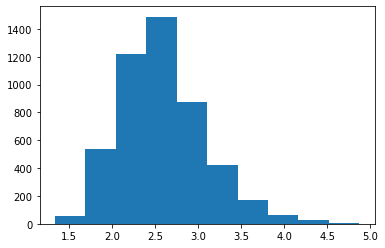

In [64]:
plt.hist(df_train.Old_Dur)

(array([ 116.,  387., 1070., 1427., 1124.,  482.,  196.,   51.,   19.,
           4.]),
 array([0.38, 0.65, 0.92, 1.19, 1.46, 1.73, 2.  , 2.27, 2.54, 2.81, 3.08]),
 <BarContainer object of 10 artists>)

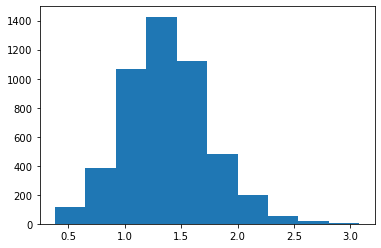

In [65]:
plt.hist(df_train.New_Dur)

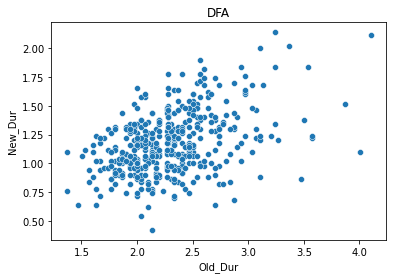

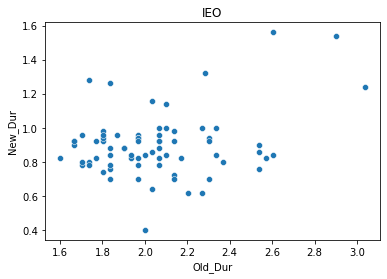

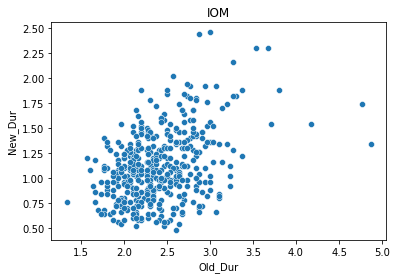

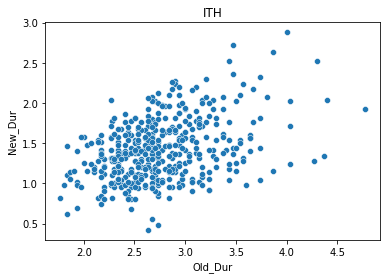

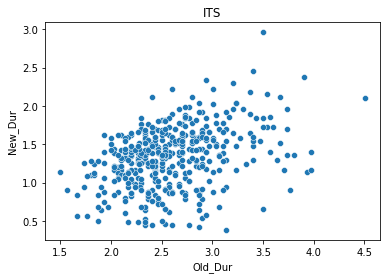

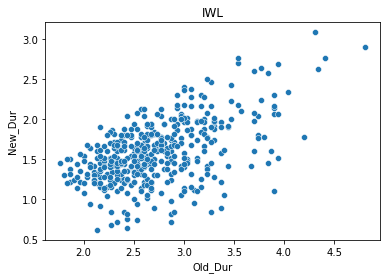

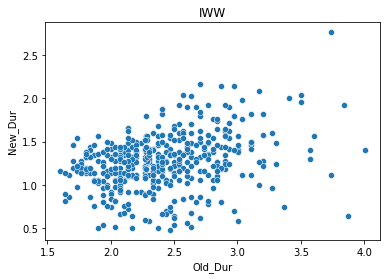

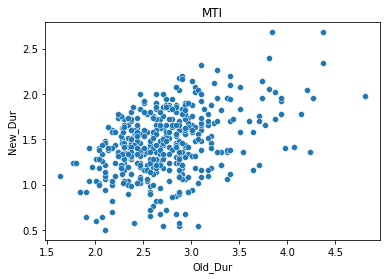

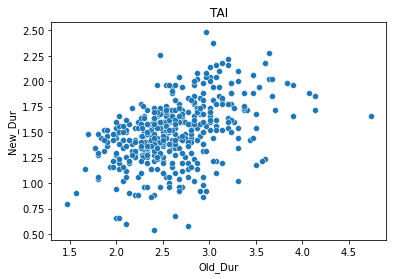

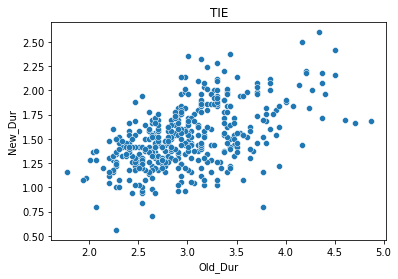

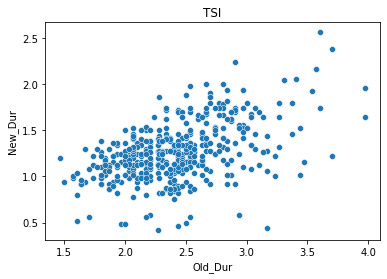

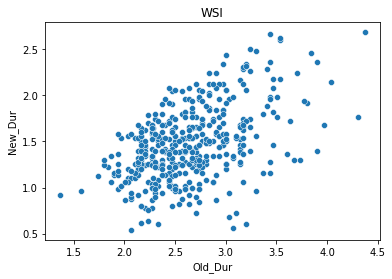

In [77]:
sentences = np.unique(df_train.SentenceID)
for sentence in sentences:
    plt.figure()
    df_sentence = df_train.loc[df_train.SentenceID==sentence]
    sns.scatterplot(data=df_sentence, x='Old_Dur', y='New_Dur')
    plt.title(sentence)